In [28]:
import os, sys

sys.path.append(os.path.join(os.getcwd(), '../src/'))
from data_reader.data_reader import DataReader

In [29]:
dr = DataReader()
shot_df = dr.read_shots("shots-20201201010000", start_shot_number=1, end_shot_number=4)
shot_df.head()

,timestamp,sequential_number,sequential_number_by_shot,displacement,load01,load02,load03,load04,shot_number,tags
0,1.606752e+09,0,0,49.171,0.568421,0.526316,0.597368,0.502632,1,"[異常A, 異常B]"
1,1.606752e+09,1,1,49.245,0.550000,0.526316,0.623684,0.507895,1,"[異常A, 異常B]"
2,1.606752e+09,2,2,49.136,0.568421,0.510526,0.660526,0.521053,1,"[異常A, 異常B]"
3,1.606752e+09,3,3,49.184,0.600000,0.502632,0.678947,0.521053,1,"[異常A, 異常B]"
4,1.606752e+09,4,4,49.149,0.578947,0.473684,0.671053,0.521053,1,"[異常A, 異常B]"


In [30]:
shots_meta_df = dr.read_shots_meta("shots-meta-20201201010000")
shots_meta_df.head()

,shot_number,spm,num_of_samples_in_cut_out
0,1,80.598572,3125.0
1,2,80.613753,3113.0
2,3,80.594235,3129.0
3,4,80.636509,3097.0
4,5,80.582338,3140.0


In [32]:
from analyze.h_one_extract_features import *

# spm = shots_meta_df[shots_meta_df.shot_number == 1].spm
# # print(f"spm: {spm}")

# max_indies, max_values = extract_features(shot_df, spm, max_load)
# print(max_indies, max_values)

# start_indies, start_values = extract_features(shot_df, spm, load_start2)
# print(start_indies, start_values)

# break_indies, break_values = extract_features(shot_df, spm, breaking)
# print(break_indies, break_values)

In [12]:
# from analyze.analyze import *
# main(target="20201201010000")


/home/ymiyamoto5/h-one-experimental-system/notebooks/../src/analyze/./h_one_extract_features.py:137: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_end = df[100 : df.d.argmax()][df.sd > 0.2].index[0]  # 標準化変位が0.2を超えた -> sd_end
/home/ymiyamoto5/h-one-experimental-system/notebooks/../src/analyze/./h_one_extract_features.py:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  h = df[sd_start:sd_end][df.sv > 0.2].index[0]  # sd_start:sd_endの範囲で、標準化速度が0.2を超えた最初の点


KeyboardInterrupt: 

In [35]:
shot_df

,timestamp,sequential_number,sequential_number_by_shot,displacement,load01,load02,load03,load04,shot_number,tags
0,1.606752e+09,0,0,49.171,0.568421,0.526316,0.597368,0.502632,1,"[異常A, 異常B]"
1,1.606752e+09,1,1,49.245,0.550000,0.526316,0.623684,0.507895,1,"[異常A, 異常B]"
2,1.606752e+09,2,2,49.136,0.568421,0.510526,0.660526,0.521053,1,"[異常A, 異常B]"
3,1.606752e+09,3,3,49.184,0.600000,0.502632,0.678947,0.521053,1,"[異常A, 異常B]"
4,1.606752e+09,4,4,49.149,0.578947,0.473684,0.671053,0.521053,1,"[異常A, 異常B]"
...,...,...,...,...,...,...,...,...,...,...
9362,1.606752e+09,9362,3124,34.116,1.723684,1.305263,-0.984211,0.123684,3,"[異常A, 異常B]"
9363,1.606752e+09,9363,3125,34.068,1.757895,1.326316,-0.942105,0.150000,3,"[異常A, 異常B]"
9364,1.606752e+09,9364,3126,34.042,1.765789,1.321053,-0.889474,0.152632,3,"[異常A, 異常B]"
9365,1.606752e+09,9365,3127,34.033,1.776316,1.313158,-0.842105,0.178947,3,"[異常A, 異常B]"


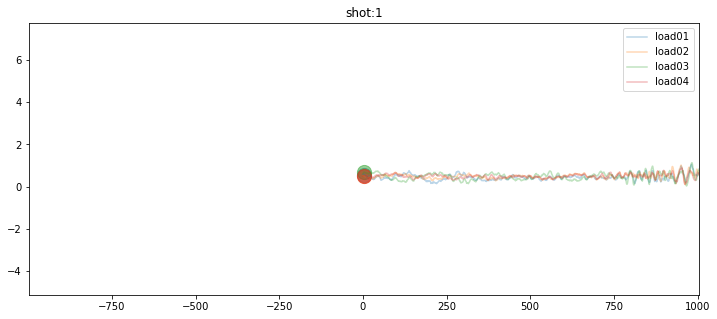

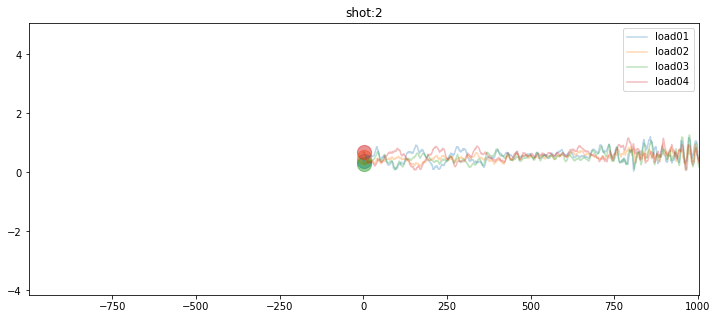

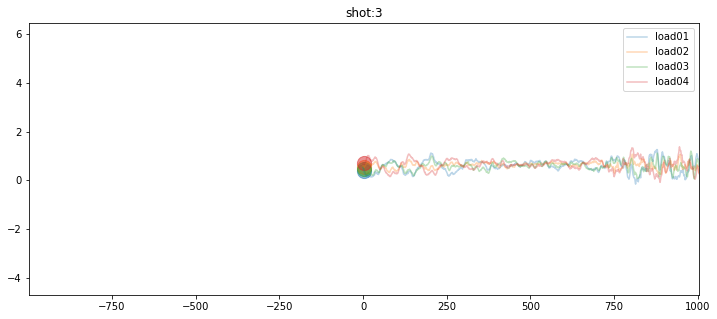

In [33]:
for shot in [1, 2, 3]:
    shot_data = shot_df[shot_df.shot_number == shot]
    shot_data = shot_data.reset_index()

    argmax,valmax = extract_features(shot_data, 80.0, breaking, shot=shot, disp_chart=True) 